# Handwritten Digits Recognition

Name: Bhushan Ingale

Date: 27/09/2023

Team ID: PTID-CDS-SEP-23-1652

Project ID: PRCP-1002-HandwrittenDigits


## 1. Domain Analysis

**Problem Statement:**

Correctly identify digits from a dataset of tens of thousands of handwritten images.

- Task 1: Prepare a complete data analysis report on the given data.

- Task 2: Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.

- Task 3: Compare between various models and find the classifier that works better.

**ML/AI Problem Statement:**

Classify the Images using CNNs.

**About Data:**

**MNIST** ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

Images of digits were taken from a variety of scanned documents, normalized in size, and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on machine learning with minimal data cleaning or preparation required.

Each image is a 28×28-pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model, and a separate set of 10,000 images are used to test it.

It is a digit recognition task. As such, there are ten digits (0 to 9) or ten classes to predict. Results are reported using prediction error, which is nothing more than the inverted classification accuracy.

## 2. Set-up

In [3]:
# Load the Dataset and Import necessary libraries:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline


In [6]:
# Load & Split the MNIST dataset into train & test:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## 3. EDA

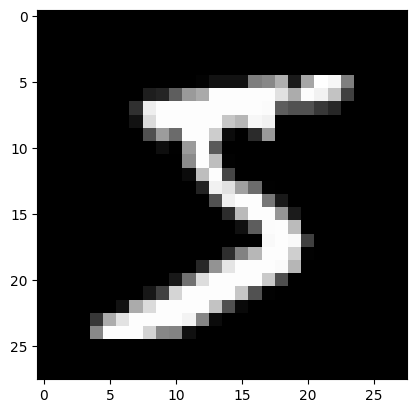

In [ ]:
# Plot 1st Image that in in the Training Data:
plt.imshow(X_train[0],cmap='gray')

In [ ]:
# Plot 4 images as gray scale:

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))

plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

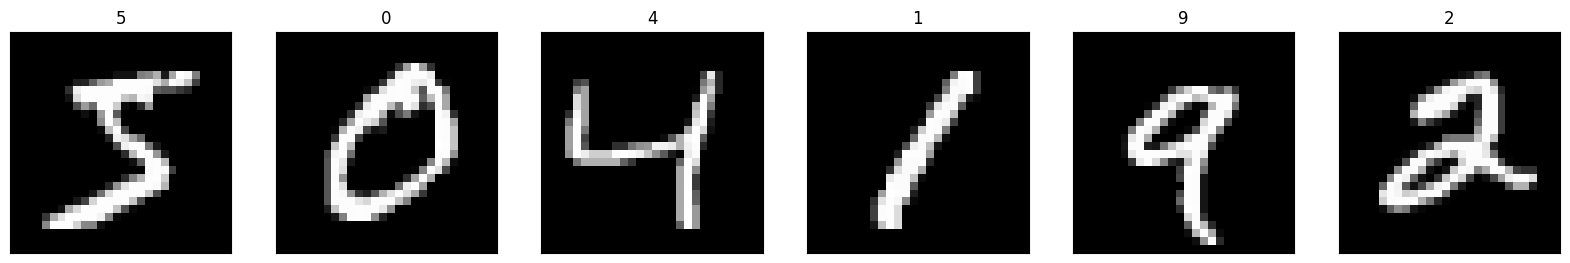

In [ ]:
# Plot first 6 training images:
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

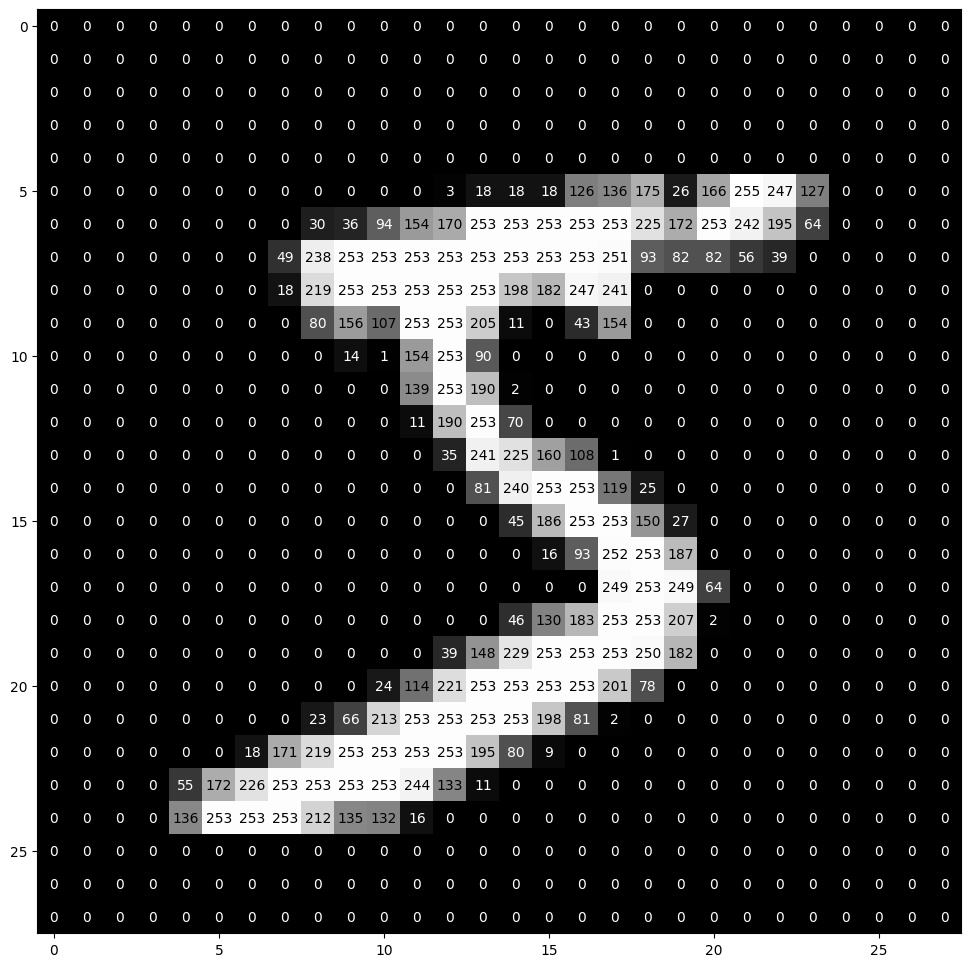

In [ ]:
# View an image in more detail:

def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

<Axes: >

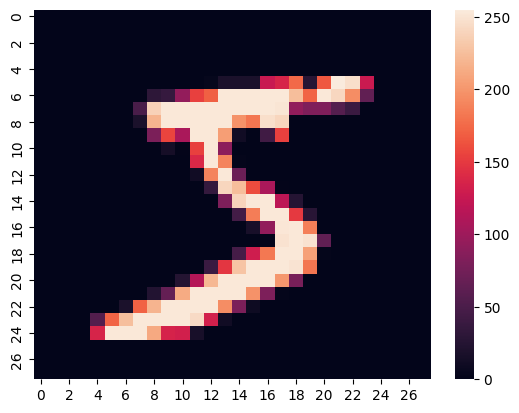

In [ ]:
# Check Heatmap for 1st Training Image:

sns.heatmap(X_train[0])

## 4. Data Preprocessing

**Reshape**:

The training dataset is structured as a 3-dimensional array of instance, image width, and image height. For a multi-layer perceptron model, you must reduce the images down into a vector of pixels. In this case, the 28×28-sized images will be 784 pixel input values.

In order to prepare our image data for use with a neural network, we need to reshape it into 3D matrices.
Our original images are 28x28 pixels in size, so we reshape them into 28x28x1 matrices to add an extra dimension for channels.
This is necessary because Keras, the deep learning library we are using, expects image data to be represented as 3D tensors with dimensions (width, height, channels).

You can do this transform easily using the reshape() function on the NumPy array. You can also reduce your memory requirements by forcing the precision of the pixel values to be 32-bit, the default precision used by Keras anyway.

Since our images are grayscale, we only need one channel to represent them, hence the "1" in the last dimension of the reshaped matrix.

In [7]:
# Reshape the data:
# Flatten 28*28 images to a 784 vector for each image:

num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')


**Normalization**:

- In order to reduce the impact of illumination differences on image analysis, we perform grayscale normalization.
- By normalizing the grayscale values of the images, we can ensure that the CNN is able to more accurately analyze and classify the images.
- Normalization can also help to improve the consistency of the image data, making it easier to train the model and achieve better performance.

The pixel values are grayscale between 0 and 255. It is almost always a good idea to perform some scaling of input values when using neural network models. Because the scale is well known and well behaved, you can very quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255.

CNN speed improvement through normalization:

In addition to improving the accuracy of the CNN, normalization can also have a positive impact on the speed of the model.
By reducing the variation in grayscale values across different images, the CNN can process the data more quickly and efficiently.

In [8]:
# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

print(f"X_train shape: {X_train.shape}")
print(f"test shape: {X_test.shape}")

X_train shape: (60000, 784)
test shape: (10000, 784)


**Label Encoding**:

- In order to use categorical labels in our neural network, we need to encode them as numerical values.
- One common method for doing this is label encoding, where each unique label is assigned a unique integer value.
- However, since these numerical labels have an inherent ordering (e.g. 4 is "greater" than 2), they may not be suitable for use in certain types of models.
- To address this issue, we can use one-hot encoding to represent each label as a binary vector where only the corresponding label index is set to 1, and all other indices are set to 0.

Finally, the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one-hot encoding of the class values, transforming the vector of class integers into a binary matrix.

You can easily do this using the built-in `tf.keras.utils.to_categorical()` helper function in Keras.

In [9]:
# One Hot Encoding the outputs:

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

## 5. Modelling

### 5.1 Baseline Model: Simple Neural Network

We will now create our Simple Neural Network model. We will define this model in a function. This is handy to extend the example later and try and get a better score.

In [10]:
# Defining a Baseline Model:

def baseline_model():
	# Create Model
	model = Sequential()
	model.add(Dense(num_pixels, input_shape=(num_pixels,), kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

	# Compile Model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

The model is a Simple Neural Network with one hidden layer with the same number of neurons as there are inputs (784). A rectifier activation function `relu` is used for the neurons in the hidden layer.

A `softmax` activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the ten to be selected as the model’s output prediction. Logarithmic loss is used as the loss function (called `categorical_crossentropy` in Keras), and the efficient `adam` gradient descent algorithm is used to learn the weights.

We can now fit and evaluate the model. The model is fit over ten epochs with updates every 200 images. The test data is used as the validation dataset, allowing you to see the skill of the model as it trains. A verbose value of 2 is used to reduce the output to one line for each training epoch.

Finally, the test dataset is used to evaluate the model, and a classification error rate is printed.

In [11]:
# Build the Model
model = baseline_model()

# Fit the Model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the Model
scores = model.evaluate(X_test, y_test, verbose=0)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 7s - loss: 0.2765 - accuracy: 0.9216 - val_loss: 0.1407 - val_accuracy: 0.9597 - 7s/epoch - 22ms/step
Epoch 2/10
300/300 - 6s - loss: 0.1105 - accuracy: 0.9678 - val_loss: 0.0929 - val_accuracy: 0.9722 - 6s/epoch - 20ms/step
Epoch 3/10
300/300 - 6s - loss: 0.0712 - accuracy: 0.9792 - val_loss: 0.0752 - val_accuracy: 0.9766 - 6s/epoch - 20ms/step
Epoch 4/10
300/300 - 7s - loss: 0.0489 - accuracy: 0.9861 - val_loss: 0.0753 - val_accuracy: 0.9775 - 7s/epoch - 22ms/step
Epoch 5/10
300/300 - 6s - loss: 0.0361 - accuracy: 0.9899 - val_loss: 0.0683 - val_accuracy: 0.9776 - 6s/epoch - 21ms/step
Epoch 6/10
300/300 - 6s - loss: 0.0260 - accuracy: 0.9933 - val_loss: 0.0601 - val_accuracy: 0.9813 - 6s/epoch - 21ms/step
Epoch 7/10
300/300 - 6s - loss: 0.0196 - accuracy: 0.9950 - val_loss: 0.0628 - val_accuracy: 0.9812 - 6s/epoch - 20ms/step
Epoch 8/10
300/300 - 7s - loss: 0.0143 - accuracy: 0.9968 - val_loss: 0.0592 - val_accuracy: 0.9829 - 7s/epoch - 23ms/step
Epoch 9/10
300/3

Error Rate: 1.96%

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623290 (2.38 MB)
Trainable params: 623290 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 5.2 Simple Convolutional Neural Network

We will now create a simple CNN for MNIST dataset that demonstrates how to use all the aspects of a CNN implementation, including Convolutional layers, Pooling layers, and Dropout layers.

- We need to load the MNIST dataset and reshape it to be suitable for training a CNN. In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height][channels].

- We are forcing so-called channels-last ordering for consistency in this example.

- In the case of RGB, the last dimension pixels would be 3 for the red, green, and blue components, and it would be like having three image inputs for every color image. In the case of MNIST, where the pixel values are grayscale, the pixel dimension is set to 1.

In [14]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [15]:
# Reshape to be [samples][width][height][channels]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

As before, it is a good idea to Normalize the pixel values to the range 0 and 1 and one-hot encode the output variables.

In [16]:
# Normalize inputs from 0-255 to 0-1:
X_train = X_train / 255
X_test = X_test / 255

# One Hot encode outputs:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

Next, we define Neural Network Model.

Convolutional neural networks are more complex than standard multi-layer perceptrons, so we will start by using a simple structure that uses all the elements for state-of-the-art results. Below summarizes the network architecture.

- The first hidden layer is a convolutional layer called a `Convolution2D`. The layer has 32 feature maps, with the size of 5×5 and a `rectifier` activation function. This is the input layer that expects images with the structure outlined above: [pixels][width][height].
- Next, we will define a pooling layer that takes the max called `MaxPooling2D`. It is configured with a pool size of 2×2.
- The next layer is a regularization layer using dropout called `Dropout`. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
- Next is a layer that converts the 2D matrix data to a vector called `Flatten`. It allows the output to be processed by standard, fully connected layers.
- Next is a fully connected layer with 128 neurons and a `rectifier` activation function.
- Finally, the output layer has ten neurons for the ten classes and a `softmax` activation function to output probability-like predictions for each class.
- As before, the model is trained using `logarithmic loss` and the ADAM gradient descent algorithm.

In [17]:
def cnn_model():
	# Create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


We will evaluate the model the same way as before with the multi-layer perceptron. The CNN is fit over ten epochs with a batch size of 200.

In [19]:
# Build the Model
model = cnn_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model:
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))


Epoch 1/10
300/300 - 32s - loss: 0.2496 - accuracy: 0.9302 - val_loss: 0.0791 - val_accuracy: 0.9746 - 32s/epoch - 105ms/step
Epoch 2/10
300/300 - 31s - loss: 0.0739 - accuracy: 0.9783 - val_loss: 0.0497 - val_accuracy: 0.9845 - 31s/epoch - 102ms/step
Epoch 3/10
300/300 - 31s - loss: 0.0525 - accuracy: 0.9841 - val_loss: 0.0405 - val_accuracy: 0.9859 - 31s/epoch - 105ms/step
Epoch 4/10
300/300 - 30s - loss: 0.0401 - accuracy: 0.9879 - val_loss: 0.0403 - val_accuracy: 0.9867 - 30s/epoch - 100ms/step
Epoch 5/10
300/300 - 31s - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0358 - val_accuracy: 0.9879 - 31s/epoch - 102ms/step
Epoch 6/10
300/300 - 30s - loss: 0.0261 - accuracy: 0.9921 - val_loss: 0.0334 - val_accuracy: 0.9894 - 30s/epoch - 102ms/step
Epoch 7/10
300/300 - 31s - loss: 0.0236 - accuracy: 0.9928 - val_loss: 0.0313 - val_accuracy: 0.9900 - 31s/epoch - 103ms/step
Epoch 8/10
300/300 - 32s - loss: 0.0181 - accuracy: 0.9938 - val_loss: 0.0403 - val_accuracy: 0.9861 - 32s/epoch - 107

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               589952    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

the CNN has achieved an Error Rate of `1.22%`, which is better than our Simple Multi-Layer Perceptron Model above.

### Model Evaluation

### Testing on New Data

## 6. Conclusion